In [188]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [189]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')


In [190]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#Phân tích đơn biến

In [191]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

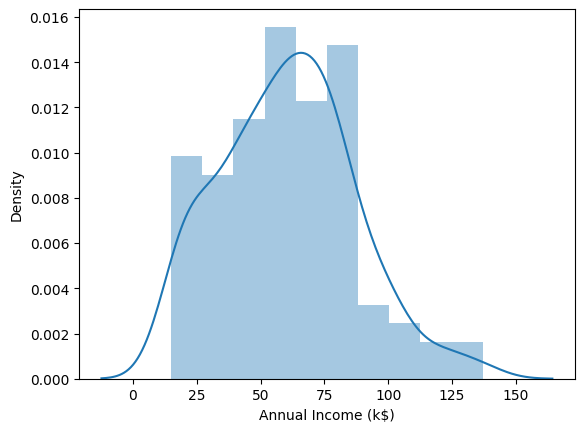

In [192]:
sns.distplot(df['Annual Income (k$)'])

In [193]:
 df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

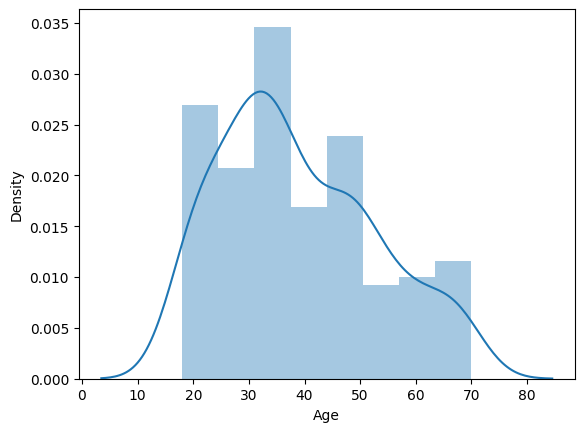

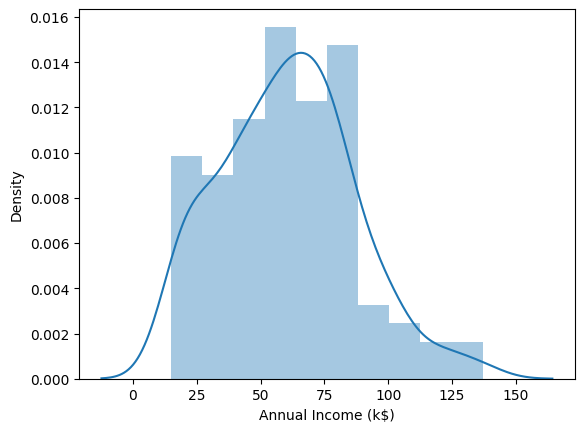

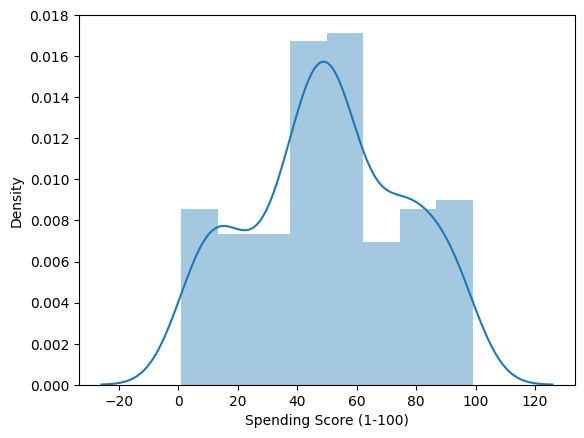

In [194]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.pyplot.figure()
  sns.distplot(df[i])


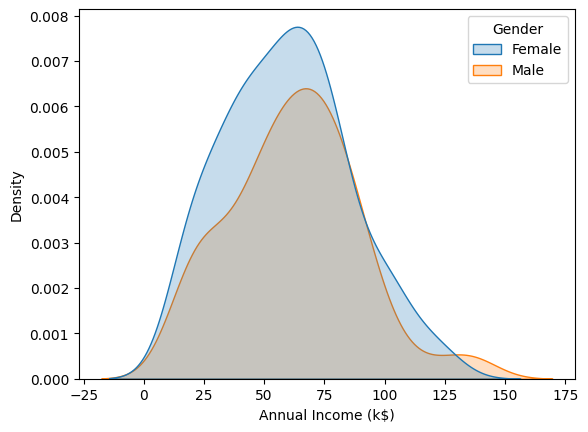

In [195]:
df['Gender']=df['Gender'].astype ('category')
sns.kdeplot(data=df,x='Annual Income (k$)', fill=True,hue='Gender');

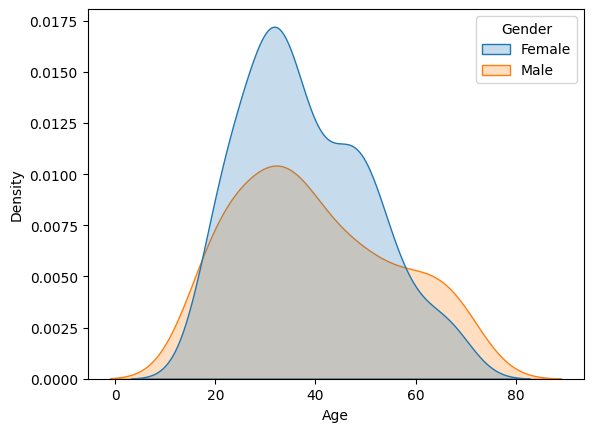

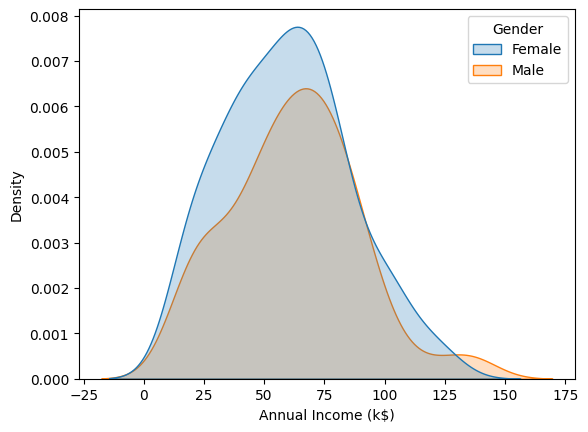

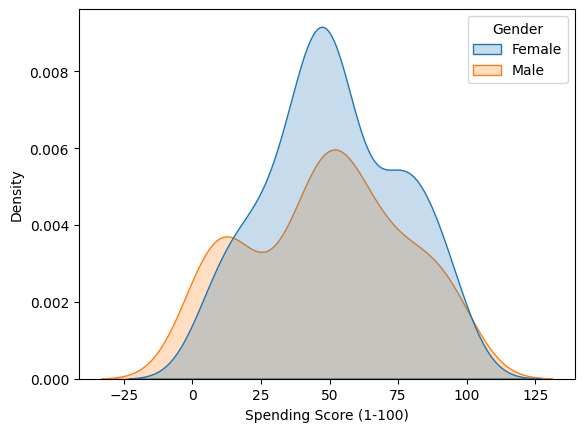

In [196]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.pyplot.figure()
  sns.kdeplot(data=df,x=i, fill=True,hue='Gender');

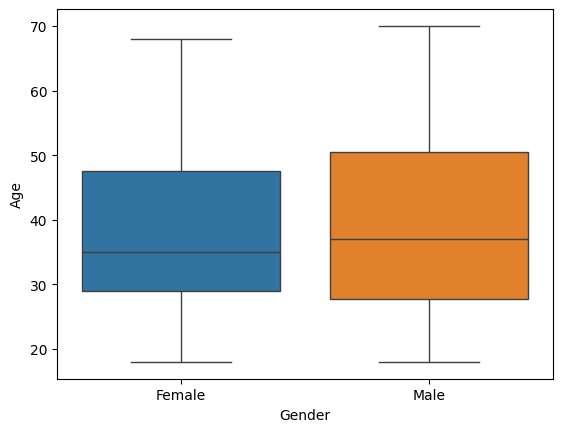

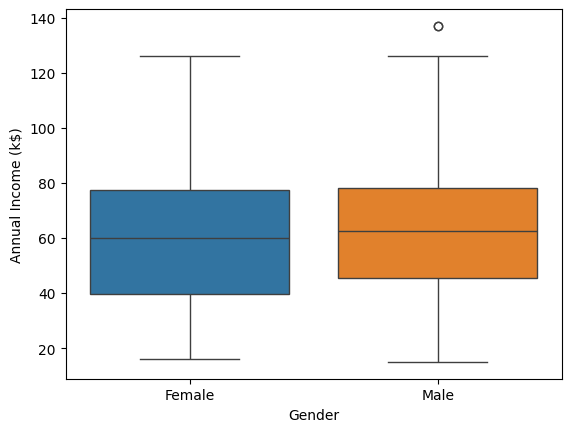

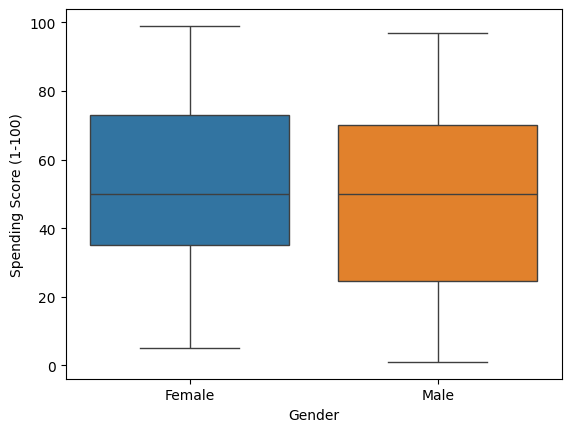

In [197]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.pyplot.figure()
  sns.boxplot(data=df,x='Gender',y=df[i],hue='Gender');

In [198]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


#Phân tích đa biến


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

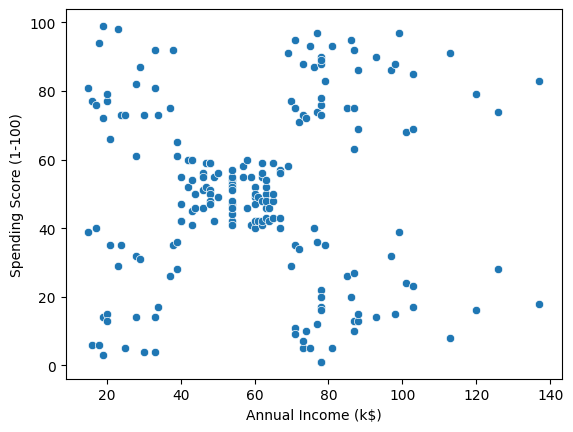

In [199]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

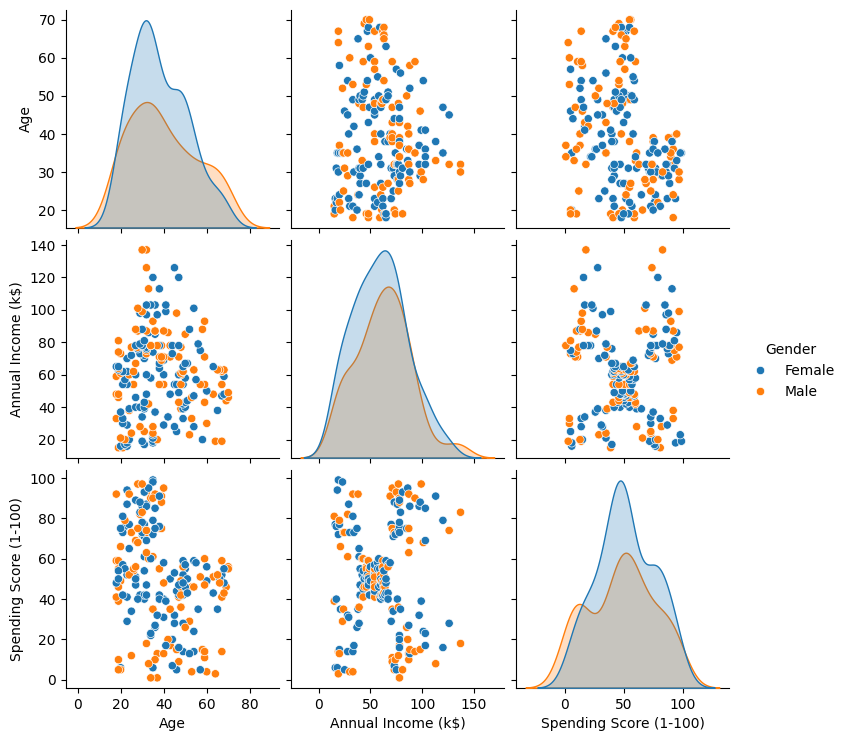

In [200]:
df=df.drop('CustomerID', axis = 1)
sns.pairplot(df,hue='Gender')

In [201]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [202]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = df.drop(columns=['Gender'])  # Drop the 'Gender' column
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

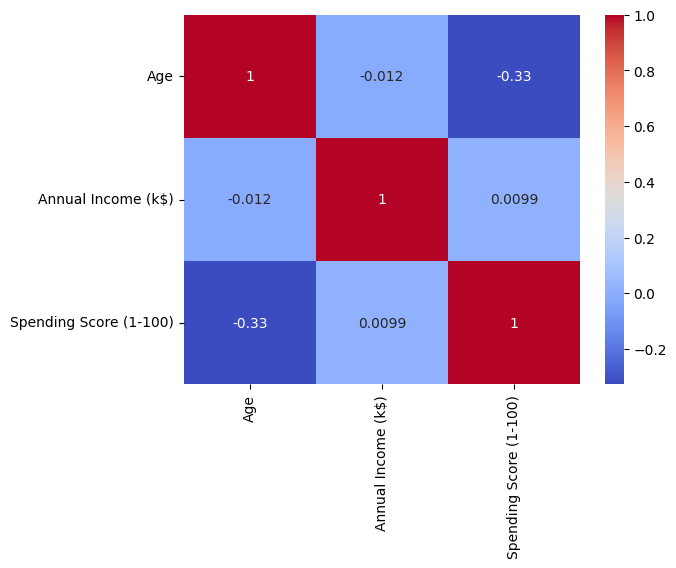

In [203]:

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [204]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")  # Re-read the original file
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Phân cụm - Đơn Biến và Đa Biến

In [205]:
clustering1 = KMeans(n_clusters=3)

In [206]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [207]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [208]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [209]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
1,86
2,58
0,56


In [210]:
clustering1.inertia_

25640.457784396807

In [211]:
inertia_scores = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [212]:
inertia_scores

[137277.2800000002,
 49761.737012987025,
 25640.457784396807,
 14647.235170393054,
 8675.385020242913,
 5503.407059314959,
 4424.823725981626,
 3481.42909278544,
 2573.6785714285716,
 1991.6956876456866]

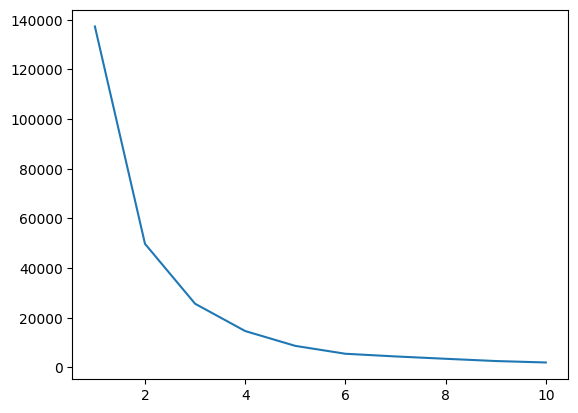

In [213]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),inertia_scores)


In [214]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [215]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


Phân cụm đa biến

In [216]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


In [217]:
inertia_scores2= []
for i in range (1,11):
  kmeans2 = KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)

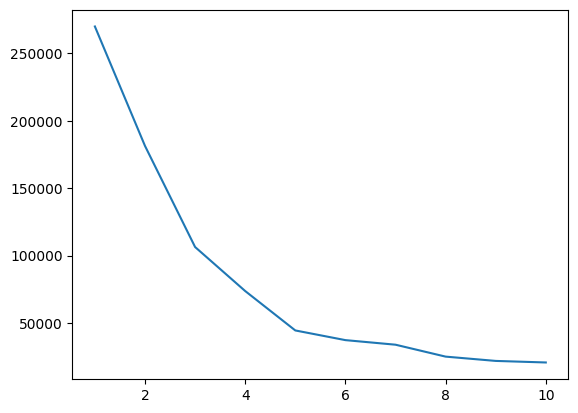

In [218]:

plt.plot(range(1,11),inertia_scores2)

In [219]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

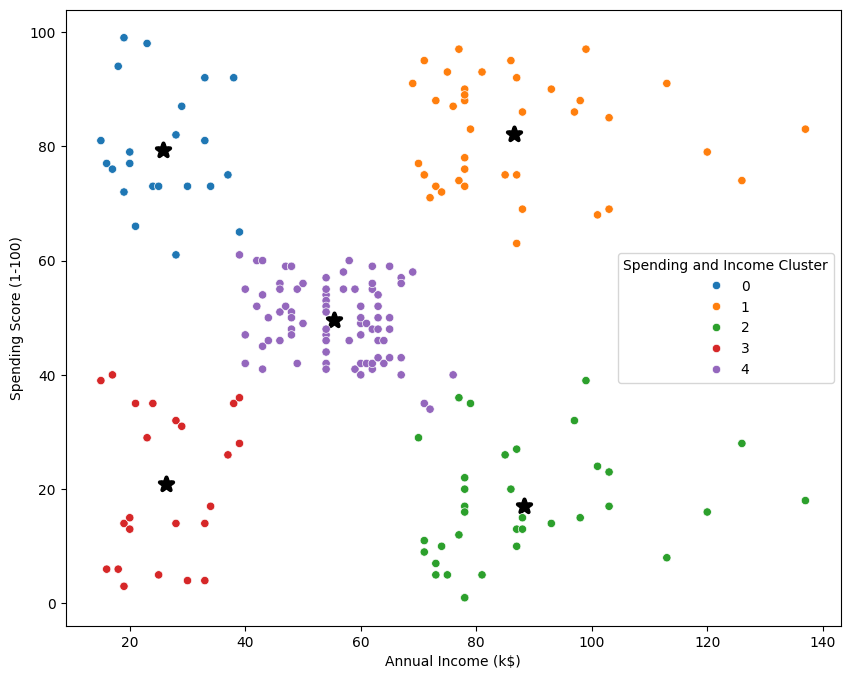

In [220]:
plt.figure(figsize=(10, 8))
plt.scatter(centers['x'], centers['y'], marker='*', s=100, linewidths=3, color='black')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')

In [222]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.592593,0.407407


In [221]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


Multivariate clustering

In [223]:
from sklearn.preprocessing import StandardScaler


In [224]:
scale = StandardScaler()

In [225]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


In [235]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,3
1,2,1,21,15,81,2,0
2,3,0,20,16,6,2,3
3,4,0,23,16,77,2,0
4,5,0,31,17,40,2,3


In [236]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [238]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender']]

dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [242]:
dff=scale.fit_transform(dff)

In [246]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


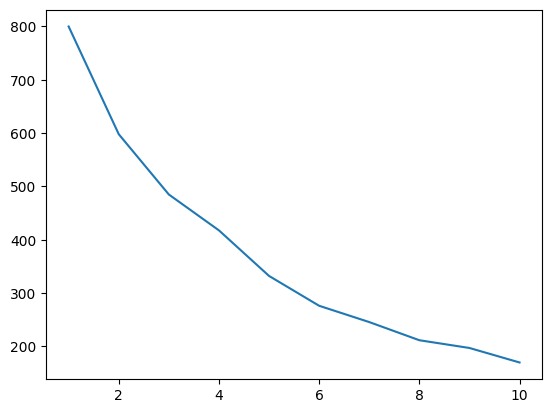

In [248]:
inertia_scores3= []
for i in range (1,11):
  kmeans3 = KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

Phân tích

Nhóm mục tiêu sẽ là cụm 1, nhóm này có điểm chi tiêu cao và thu nhập cao.

54% khách hàng trong cụm 1 là phụ nữ. Chúng ta nên tìm cách thu hút những khách hàng này bằng một chiến dịch tiếp thị tập trung vào các mặt hàng phổ biến trong cụm này.

Cụm 2 mang đến cơ hội thú vị để tiếp thị đến khách hàng trong các sự kiện giảm giá với những mặt hàng phổ biến.